In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
import glob
import functools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['figure.figsize'] = (12,12)

from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image

In [3]:
!pip install SimpleITK
import h5py
import SimpleITK as sitk

# Import image volumes

In [4]:
%cd '/content/gdrive/My Drive/DeepLearning/2DUnet-git'

/content/gdrive/My Drive/DeepLearning/2DUnet-git


In [5]:
from utils import getTrainNLabelNames
from preProcess import RescaleIntensity

!pip install -U scikit-image

import skimage
print(skimage.__version__)
from skimage.transform import match_histograms

Requirement already up-to-date: scikit-image in /usr/local/lib/python3.6/dist-packages (0.15.0)
0.15.0


<Figure size 864x864 with 0 Axes>

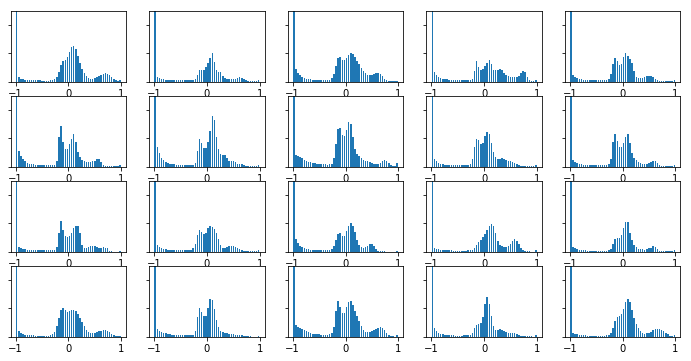

<Figure size 864x864 with 0 Axes>

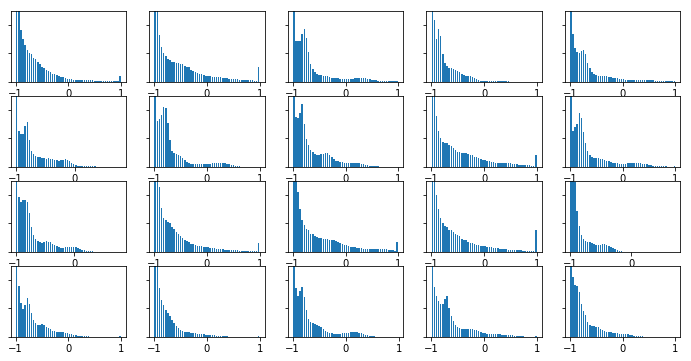

In [6]:
modality = ["ct", "mr"]
data_folder = '/content/gdrive/My Drive/ImageData/MMWHS'

for m in modality:
  hist_grams = []
  imgVol_fn, _ = getTrainNLabelNames(data_folder, m)
  plt.figure()
  fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(12, 6), facecolor='w', edgecolor='k')
  for i, ax in enumerate(fig.axes):
    img_path = imgVol_fn[i]
    imgVol = sitk.GetArrayFromImage(sitk.ReadImage(img_path))  # numpy array
    imgVol = RescaleIntensity(imgVol, m)
    hist, bins = np.histogram(imgVol.flatten(), bins=50, density=True)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    ax.bar(center, hist, align='center', width=width)
    ax.set_ylim(0,2.5)
    ax.set_yticklabels([])
  plt.show()